In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# define the ODE system
def enzymes(y, t, k1m, k1p, k2, Js, Jp):
    
    S, E, C, P = y;

    dS = k1m*C - k1p*S*E + Js;
    dE = (k1m+k2)*C - k1p*S*E;
    dC = k1p*S*E - (k2+k1m)*C;
    dP = k2*C - Jp;

    return [dS, dE, dC, dP];



In [3]:
# make a tuple for the parameters
D = (k1m, k1p, k2, Js, Jp) = (10.,20.,30.,1.,1.) # what happens if Js!=Jp?

In [4]:
# define initial conditions
S0 = 1.
E0 = 1.
C0 = 0.
P0 = 0.
Y0 = [S0, E0, C0, P0]



In [5]:
# solve the ODE system
T = np.linspace(0,1,1001);
Y = odeint(enzymes, Y0, T, D)


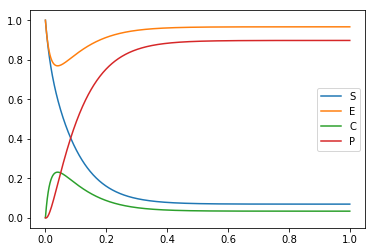

In [6]:
plt.plot(T,Y);
plt.legend(('S','E','C','P'))
plt.show()

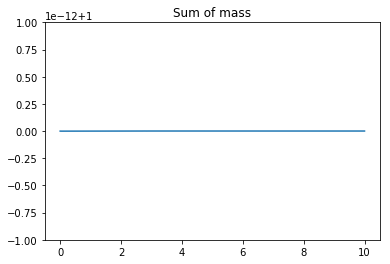

In [6]:
plt.plot(T,Y[:,0]+Y[:,2]+Y[:,3]); plt.title('Sum of mass'); plt.show()

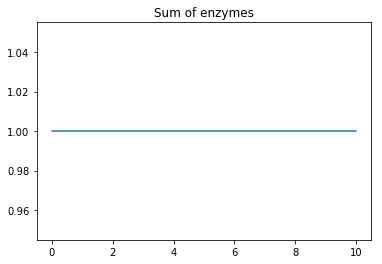

In [7]:
plt.plot(T,Y[:,1]+Y[:,2]); plt.title('Sum of enzymes'); plt.show()

In [9]:
# The concentration at the end of the simulation (close to steady state)
[S, E, C, P] = Y[-1,:]
# The production rate (by definition)
k2*C


1.0001368009904177

In [13]:
E_tot = E0 + C0
V_max = k2*E_tot
Km = (k1m+k2)/k1p
# expression of production in steady state:
J = V_max*S/(S+Km) 
print(J)



1.00009753478
